<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/11thWeekTasks/Classification_dummy_data_%26_model_classification_with_deep_learning_on_heart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ketut Satria Wibisana

NIM : 1103213148

Lecture Week 11 : Classification Dummy data & model classification with deep learning


Dataset : heart

Dokumentasi ChatGPT :[Link](https://chatgpt.com/share/675c827d-0a10-8005-a0ad-4ca8ba13351c)

In [1]:
# Hubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **#Import Library**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import itertools

In [7]:
# Path ke file dataset di Google Drive
file_path = '/content/drive/MyDrive/Dataset/heart.csv'

# Contoh: Membaca dataset dengan Pandas
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dataset
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


### **#Langkah 1: Membuat Dummy Data**

In [3]:
# Memeriksa data duplikat
print("Jumlah baris sebelum menghapus duplikat:", data.shape[0])
duplicates = data.duplicated()
print("Jumlah baris duplikat:", duplicates.sum())

Jumlah baris sebelum menghapus duplikat: 1025
Jumlah baris duplikat: 723


In [5]:
#Membersihkan data yang duplikat
data_cleaned = data.drop_duplicates()

# Memeriksa ulang setelah membersihkan
print("\nJumlah baris setelah menghapus duplikat:", data_cleaned.shape[0])


Jumlah baris setelah menghapus duplikat: 302


In [8]:
# Membuat dummy variables untuk kolom kategorikal
data_dummies = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal', 'ca'], drop_first=True)


In [9]:
# Memisahkan fitur (X) dan target (y)
X = data_dummies.drop(columns=['target'])
y = data_dummies['target']

In [10]:
# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### **#Langkah 2: Membuat Model Klasifikasi dengan Deep Learning**

In [13]:
# Membangun model deep learning
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer untuk klasifikasi biner
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5533 - loss: 0.6995 - val_accuracy: 0.7683 - val_loss: 0.5864
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7178 - loss: 0.5581 - val_accuracy: 0.8232 - val_loss: 0.5020
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8148 - loss: 0.4582 - val_accuracy: 0.8354 - val_loss: 0.4540
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8616 - loss: 0.3853 - val_accuracy: 0.8476 - val_loss: 0.4234
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8626 - loss: 0.3533 - val_accuracy: 0.8476 - val_loss: 0.4023
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8486 - loss: 0.3677 - val_accuracy: 0.8537 - val_loss: 0.3884
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8645 - loss: 0.3546 - val_accuracy: 0.8598 - val_loss: 0.3805
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8724 - loss: 0.2998 - val_accuracy: 0.8598 - val_loss

In [16]:
# Evaluasi model pada data testing
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.2034, Test Accuracy: 0.9415


### **#Langkah 3: Visualisasi Performa Model**

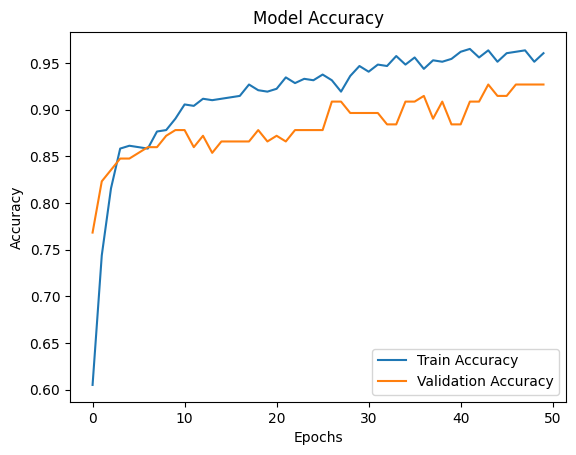

In [18]:
# Plot akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

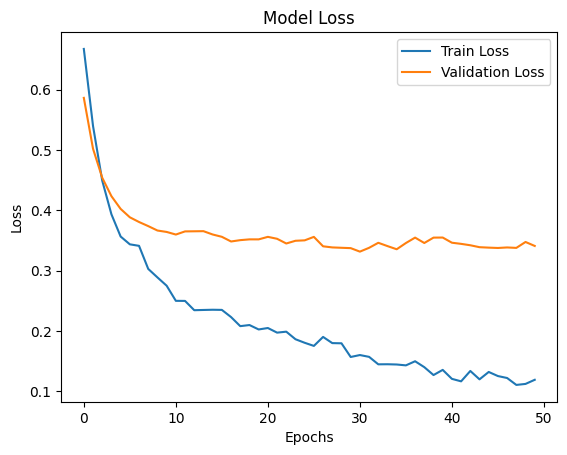

In [19]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

### **prompt gpt: Gunakan PyTorch Library, Gunakan MLP**

### **#Langkah 1: Membaca dan Memproses Dataset**

In [22]:
# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['target']).values  # Semua kolom kecuali target
y = data['target'].values  # Kolom target

In [23]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:
# Konversi ke tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [26]:
# Membuat DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [27]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### **#Langkah 2: Membangun Model MLP**

In [29]:
# Membangun model MLP
class MLPModel(nn.Module):
    def __init__(self, input_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.output(x))
        return x

In [30]:
# Inisialisasi model
input_size = X_train.shape[1]
model = MLPModel(input_size)

### **#Langkah 3: Menentukan Loss Function dan Optimizer**

In [32]:
# Loss function dan optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy untuk klasifikasi biner
optimizer = optim.Adam(model.parameters(), lr=0.001)

### **#Langkah 4: Melatih Model**

In [33]:
# Melatih model
def train_model(model, train_loader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward pass dan optimasi
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

# Melatih model
train_model(model, train_loader, criterion, optimizer, epochs=50)

Epoch 1/50, Loss: 0.6418
Epoch 2/50, Loss: 0.5284
Epoch 3/50, Loss: 0.4171
Epoch 4/50, Loss: 0.3655
Epoch 5/50, Loss: 0.3424
Epoch 6/50, Loss: 0.3248
Epoch 7/50, Loss: 0.3148
Epoch 8/50, Loss: 0.3024
Epoch 9/50, Loss: 0.3007
Epoch 10/50, Loss: 0.2948
Epoch 11/50, Loss: 0.2874
Epoch 12/50, Loss: 0.2744
Epoch 13/50, Loss: 0.2770
Epoch 14/50, Loss: 0.2795
Epoch 15/50, Loss: 0.2726
Epoch 16/50, Loss: 0.2617
Epoch 17/50, Loss: 0.2524
Epoch 18/50, Loss: 0.2506
Epoch 19/50, Loss: 0.2483
Epoch 20/50, Loss: 0.2376
Epoch 21/50, Loss: 0.2487
Epoch 22/50, Loss: 0.2249
Epoch 23/50, Loss: 0.2363
Epoch 24/50, Loss: 0.2144
Epoch 25/50, Loss: 0.2171
Epoch 26/50, Loss: 0.2066
Epoch 27/50, Loss: 0.2120
Epoch 28/50, Loss: 0.2085
Epoch 29/50, Loss: 0.1998
Epoch 30/50, Loss: 0.2044
Epoch 31/50, Loss: 0.1885
Epoch 32/50, Loss: 0.1912
Epoch 33/50, Loss: 0.2143
Epoch 34/50, Loss: 0.2035
Epoch 35/50, Loss: 0.1957
Epoch 36/50, Loss: 0.1873
Epoch 37/50, Loss: 0.1673
Epoch 38/50, Loss: 0.1731
Epoch 39/50, Loss: 0.

### **#Langkah 5: Evaluasi Model**

In [34]:
# Evaluasi model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

# Evaluasi model
evaluate_model(model, test_loader)


Test Accuracy: 0.9073


### **prompt gpt: beri kode untuk  membandingkan Hidden Layer (1,2,3) dengan jumlah neuron (4, 8, 16, 32, 64,...)**

In [36]:
# Preprocessing data
X = data.drop(columns=['target']).values
y = data['target'].values

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [39]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [40]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [41]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [42]:
# MLP Model with Variable Hidden Layers and Neurons
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_layers, neurons):
        super(MLPModel, self).__init__()
        layers = []
        current_size = input_size
        for _ in range(hidden_layers):
            layers.append(nn.Linear(current_size, neurons))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.3))
            current_size = neurons
        layers.append(nn.Linear(current_size, 1))
        layers.append(nn.Sigmoid())
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [43]:
# Function to train model
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [44]:
# Function to evaluate model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = correct / total
    return accuracy

In [47]:
# Hyperparameter combinations
hidden_layer_options = [1, 2, 3]
neuron_options = [4, 8, 16, 32, 64]
input_size = X_train.shape[1]

results = []

for hidden_layers, neurons in itertools.product(hidden_layer_options, neuron_options):
    print(f"Training model with {hidden_layers} hidden layer(s) and {neurons} neurons...")
    model = MLPModel(input_size=input_size, hidden_layers=hidden_layers, neurons=neurons)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

   # Train model
    train_model(model, train_loader, criterion, optimizer, epochs=10)

    # Evaluate model
    accuracy = evaluate_model(model, test_loader)
    results.append((hidden_layers, neurons, accuracy))
    print(f"Accuracy: {accuracy:.4f}")

Training model with 1 hidden layer(s) and 4 neurons...
Accuracy: 0.8000
Training model with 1 hidden layer(s) and 8 neurons...
Accuracy: 0.7707
Training model with 1 hidden layer(s) and 16 neurons...
Accuracy: 0.7902
Training model with 1 hidden layer(s) and 32 neurons...
Accuracy: 0.7951
Training model with 1 hidden layer(s) and 64 neurons...
Accuracy: 0.8098
Training model with 2 hidden layer(s) and 4 neurons...
Accuracy: 0.8098
Training model with 2 hidden layer(s) and 8 neurons...
Accuracy: 0.7561
Training model with 2 hidden layer(s) and 16 neurons...
Accuracy: 0.8195
Training model with 2 hidden layer(s) and 32 neurons...
Accuracy: 0.8341
Training model with 2 hidden layer(s) and 64 neurons...
Accuracy: 0.8341
Training model with 3 hidden layer(s) and 4 neurons...
Accuracy: 0.7854
Training model with 3 hidden layer(s) and 8 neurons...
Accuracy: 0.8049
Training model with 3 hidden layer(s) and 16 neurons...
Accuracy: 0.8049
Training model with 3 hidden layer(s) and 32 neurons...
A

In [48]:
# Display results
results_df = pd.DataFrame(results, columns=['Hidden Layers', 'Neurons', 'Accuracy'])
print("\nComparison Results:")
print(results_df)


Comparison Results:
    Hidden Layers  Neurons  Accuracy
0               1        4  0.800000
1               1        8  0.770732
2               1       16  0.790244
3               1       32  0.795122
4               1       64  0.809756
5               2        4  0.809756
6               2        8  0.756098
7               2       16  0.819512
8               2       32  0.834146
9               2       64  0.834146
10              3        4  0.785366
11              3        8  0.804878
12              3       16  0.804878
13              3       32  0.834146
14              3       64  0.839024


In [49]:
# Save results to CSV
results_df.to_csv('comparison_results.csv', index=False)

### **prompt gpt: beri kode untuk membandingkan Activation Function (linear,Sigmoid,RelU,Softmax,Tanh)**

In [50]:
# Preprocessing data
X = data.drop(columns=['target']).values
y = data['target'].values

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [53]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [54]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


In [55]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [56]:
# MLP Model with Variable Activation Function
class MLPModel(nn.Module):
    def __init__(self, input_size, activation_fn):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.activation = activation_fn
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.sigmoid(self.output(x))  # Output untuk klasifikasi biner
        return x

In [57]:
# Function to train model
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [58]:
# Function to evaluate model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = correct / total
    return accuracy

In [59]:
# Activation functions to compare
activation_functions = {
    'Linear': nn.Identity(),
    'Sigmoid': nn.Sigmoid(),
    'ReLU': nn.ReLU(),
    'Softmax': nn.Softmax(dim=1),  # Not typically used in hidden layers
    'Tanh': nn.Tanh()
}

In [60]:
# Comparison
input_size = X_train.shape[1]
results = []

for name, activation_fn in activation_functions.items():
    print(f"Training model with {name} activation function...")
    model = MLPModel(input_size=input_size, activation_fn=activation_fn)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_model(model, train_loader, criterion, optimizer, epochs=10)

    # Evaluate model
    accuracy = evaluate_model(model, test_loader)
    results.append((name, accuracy))
    print(f"Accuracy with {name}: {accuracy:.4f}")


Training model with Linear activation function...
Accuracy with Linear: 0.7951
Training model with Sigmoid activation function...
Accuracy with Sigmoid: 0.8049
Training model with ReLU activation function...
Accuracy with ReLU: 0.8293
Training model with Softmax activation function...
Accuracy with Softmax: 0.7512
Training model with Tanh activation function...
Accuracy with Tanh: 0.8000


In [61]:
# Display results
results_df = pd.DataFrame(results, columns=['Activation Function', 'Accuracy'])
print("\nComparison Results:")
print(results_df)



Comparison Results:
  Activation Function  Accuracy
0              Linear  0.795122
1             Sigmoid  0.804878
2                ReLU  0.829268
3             Softmax  0.751220
4                Tanh  0.800000


In [62]:
# Save results to CSV
results_df.to_csv('activation_function_comparison.csv', index=False)

### **prompt gpt: beri kode untuk membandingkan Epoch (1,10,25,50,100,250)**

In [63]:
# Preprocessing data
X = data.drop(columns=['target']).values
y = data['target'].values

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [66]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [67]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


In [68]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [69]:
# MLP Model
class MLPModel(nn.Module):
    def __init__(self, input_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.output(x))
        return x


In [70]:
# Function to train model
def train_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [71]:
# Function to evaluate model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = correct / total
    return accuracy

In [72]:
# Epoch values to compare
epoch_values = [1, 10, 25, 50, 100, 250]
input_size = X_train.shape[1]

results = []

for epochs in epoch_values:
    print(f"Training model with {epochs} epoch(s)...")
    model = MLPModel(input_size=input_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_model(model, train_loader, criterion, optimizer, epochs)

    # Evaluate model
    accuracy = evaluate_model(model, test_loader)
    results.append((epochs, accuracy))
    print(f"Accuracy with {epochs} epoch(s): {accuracy:.4f}")


Training model with 1 epoch(s)...
Accuracy with 1 epoch(s): 0.8098
Training model with 10 epoch(s)...
Accuracy with 10 epoch(s): 0.8341
Training model with 25 epoch(s)...
Accuracy with 25 epoch(s): 0.8927
Training model with 50 epoch(s)...
Accuracy with 50 epoch(s): 0.9854
Training model with 100 epoch(s)...
Accuracy with 100 epoch(s): 0.9854
Training model with 250 epoch(s)...
Accuracy with 250 epoch(s): 0.9854


In [73]:
# Display results
results_df = pd.DataFrame(results, columns=['Epochs', 'Accuracy'])
print("\nComparison Results:")
print(results_df)


Comparison Results:
   Epochs  Accuracy
0       1  0.809756
1      10  0.834146
2      25  0.892683
3      50  0.985366
4     100  0.985366
5     250  0.985366


In [74]:
# Save results to CSV
results_df.to_csv('epoch_comparison_results.csv', index=False)

### **prompt gpt: Bandingkan Learning Rate (10/1/0.1/0.01/0.001/0.0001)**

In [75]:
# Preprocessing data
X = data.drop(columns=['target']).values
y = data['target'].values

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [78]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [79]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [80]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [81]:
# MLP Model
class MLPModel(nn.Module):
    def __init__(self, input_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.output(x))
        return x

In [82]:
# Function to train model
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [83]:
# Function to evaluate model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = correct / total
    return accuracy

In [84]:
# Learning rates to compare
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
input_size = X_train.shape[1]

results = []

for lr in learning_rates:
    print(f"Training model with learning rate {lr}...")
    model = MLPModel(input_size=input_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Train model
    train_model(model, train_loader, criterion, optimizer, epochs=10)

    # Evaluate model
    accuracy = evaluate_model(model, test_loader)
    results.append((lr, accuracy))
    print(f"Accuracy with learning rate {lr}: {accuracy:.4f}")

Training model with learning rate 10...
Accuracy with learning rate 10: 0.6488
Training model with learning rate 1...
Accuracy with learning rate 1: 0.4976
Training model with learning rate 0.1...
Accuracy with learning rate 0.1: 0.8829
Training model with learning rate 0.01...
Accuracy with learning rate 0.01: 0.9122
Training model with learning rate 0.001...
Accuracy with learning rate 0.001: 0.8244
Training model with learning rate 0.0001...
Accuracy with learning rate 0.0001: 0.8146


In [85]:
# Display results
results_df = pd.DataFrame(results, columns=['Learning Rate', 'Accuracy'])
print("\nComparison Results:")
print(results_df)


Comparison Results:
   Learning Rate  Accuracy
0        10.0000  0.648780
1         1.0000  0.497561
2         0.1000  0.882927
3         0.0100  0.912195
4         0.0010  0.824390
5         0.0001  0.814634


In [86]:
# Save results to CSV
results_df.to_csv('learning_rate_comparison_results.csv', index=False)

### **prompt gpt:  Bandingkan Batch Size (16,32,64,128,256,512)**

In [87]:
# Preprocessing data
X = data.drop(columns=['target']).values
y = data['target'].values

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [90]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [91]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [92]:
# MLP Model
class MLPModel(nn.Module):
    def __init__(self, input_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.output(x))
        return x


In [93]:
# Function to train model
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [94]:
# Function to evaluate model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = correct / total
    return accuracy

In [95]:
# Batch sizes to compare
batch_sizes = [16, 32, 64, 128, 256, 512]
input_size = X_train.shape[1]

results = []

for batch_size in batch_sizes:
    print(f"Training model with batch size {batch_size}...")
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = MLPModel(input_size=input_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_model(model, train_loader, criterion, optimizer, epochs=10)

    # Evaluate model
    accuracy = evaluate_model(model, test_loader)
    results.append((batch_size, accuracy))
    print(f"Accuracy with batch size {batch_size}: {accuracy:.4f}")

Training model with batch size 16...
Accuracy with batch size 16: 0.8780
Training model with batch size 32...
Accuracy with batch size 32: 0.8439
Training model with batch size 64...
Accuracy with batch size 64: 0.8000
Training model with batch size 128...
Accuracy with batch size 128: 0.7902
Training model with batch size 256...
Accuracy with batch size 256: 0.7902
Training model with batch size 512...
Accuracy with batch size 512: 0.7854


In [96]:
# Display results
results_df = pd.DataFrame(results, columns=['Batch Size', 'Accuracy'])
print("\nComparison Results:")
print(results_df)


Comparison Results:
   Batch Size  Accuracy
0          16  0.878049
1          32  0.843902
2          64  0.800000
3         128  0.790244
4         256  0.790244
5         512  0.785366


In [98]:
# Save results to CSV
results_df.to_csv('batch_size_comparison_results.csv', index=False)